In [1]:
import requests
import json
import chess.pgn
import io
import pandas as pd
import math
import numpy as np
from chessdotcom import get_player_profile, Client

Client.request_config["headers"]["User-Agent"] = (
    "My Python Application. "
    "Contact me at email@example.com"
)
response = get_player_profile("6macb")

In [2]:
response

ChessDotComResponse(json={'player': {'avatar': 'https://images.chesscomfiles.com/uploads/v1/user/313708649.7919e6b4.200x200o.4c8a5196c09a.jpg', 'player_id': 313708649, '@id': 'https://api.chess.com/pub/player/6macb', 'url': 'https://www.chess.com/member/6macb', 'name': 'Brendan McNamee', 'username': '6macb', 'followers': 3, 'country': 'https://api.chess.com/pub/country/US', 'location': 'FL', 'last_online': 1703518174, 'joined': 1695046563, 'status': 'premium', 'is_streamer': False, 'verified': False, 'league': 'Elite'}}, player=Collection(avatar='https://images.chesscomfiles.com/uploads/v1/user/313708649.7919e6b4.200x200o.4c8a5196c09a.jpg', player_id=313708649, id='https://api.chess.com/pub/player/6macb', url='https://www.chess.com/member/6macb', name='Brendan McNamee', username='6macb', followers=3, country='https://api.chess.com/pub/country/US', location='FL', last_online=1703518174, joined=1695046563, status='premium', is_streamer=False, verified=False, league='Elite'), text='{"avat

In [3]:
player_name = response.player.name
user_name = response.player.username

In [4]:
print(player_name)
print(user_name)

Brendan McNamee
6macb


## API

In [97]:
# Api Path
url = f'https://api.chess.com/pub/player/{user_name}/games/{year}/{month}'
url

'https://api.chess.com/pub/player/6macb/games/2023/12'

In [98]:
def get_data_by_month(username, year, month):

    url = f"https://api.chess.com/pub/player/{username}/games/{year}/{month}"

    data = requests.get(url)
    if data.status_code != 200:
        raise Exception("The following response was returned: " + str(data.status_code))
    else:
        data = json.loads(data.text)
        games = data["games"]
        
    all_games=[]
    for game in games:
        pgn = (game['pgn'])
        pgn = io.StringIO(pgn)
        game = chess.pgn.read_game(pgn)
        all_games.append(game)
                
    game_list = []
    for g in all_games:
        moves = (g.mainline_moves())
        moves = [str(x) for x in moves]
        
        white = (g.headers['White'])
        if white.lower() == username.lower():
            playing_as_white = 1
        else:
            playing_as_white = 0
        
        if len(moves)>1:
            move_made = (moves[1])
        else:
            move_made = ""
        
        game = {"date": (g.headers["Date"]), "player_white": white, "player_black": (g.headers['Black']), "playing_as_white" : playing_as_white, "result": (g.headers['Result']), "termination": (g.headers['Termination']), "moves": moves, "no_of_moves": (math.ceil(len(moves)/2)), "first_move": (moves[0]), "response": move_made}
    
        
        game_list.append(game)
    game_list = pd.DataFrame(game_list)
    return game_list

In [99]:
this_year = [("2023", "01"),  ("2023", "02"), ("2023", "03"), ("2023", "04"), ("2023", "05"), ("2023", "06"), 
             ("2023", "07"), ("2023", "08"), ("2023", "09"), ("2023", "10"), ("2023", "11"), ("2023", "12")]

In [101]:
all_months = []
for date in this_year:
    year = date[0]
    month = date[1]
    
    df = get_data_by_month(user_name, year, month)
    all_months.append(df)
    time.sleep(10)
    print("Sleeping")

Exception: The following response was returned: 403

In [86]:
def combine_months(dfs):
    df_1 = pd.concat(dfs, ignore_index=True)
    return df

In [ ]:
all_months = combine_months(all_months)

# File

In [33]:
months = ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Initialize a list to store game information
games_data = []

for i in months:
    chess_path = f'DATA/ChessCom_6macb_2023{i}.pgn'
    print(chess_path)

    pgn_file_path = chess_path

    # Player name for whom you want to extract the rating
    target_player = '6macb'

    # Open the PGN file
    with open(pgn_file_path) as f:
        # Read the PGN file using the chess.pgn library
        game = chess.pgn.read_game(f)

        # Initialize a counter for GameID
        game_id_counter = 1

        # Loop through the games in the PGN file
        while game:
            # Extract the headers (metadata) of the game
            headers = game.headers

            # Extract the time control information
            time_control = headers.get('TimeControl', 'Time control not provided')

            # Check if the time control is 900+10
            if '900+10' in time_control:
                # Extract the names of White and Black players
                white_name = headers.get('White', 'Unknown')
                white_elo = headers.get('WhiteElo', 'Unknown')
                white_elo = int(white_elo)

                black_name = headers.get('Black', 'Unknown')
                black_elo = headers.get('BlackElo', 'Unknown')
                black_elo = int(black_elo)

                # Extract the result of the game
                result = headers.get('Result', 'Result not provided')

                # Extract the total number of moves
                num_moves = len([move for move in game.mainline_moves()])

                # Extract the first move from both players
                moves = list(game.mainline_moves())
                first_move_white = moves[0].uci() if moves else 'No moves'
                first_move_black = moves[1].uci() if len(moves) > 1 else 'No moves'

                # Extract the date of the game
                date = headers.get('Date', 'Date not provided')

                # Determine the winner and loser based on the result
                if result == '1-0':
                    winner = white_name
                    loser = black_name
                    winning_color = 'White'
                elif result == '0-1':
                    winner = black_name
                    loser = white_name
                    winning_color = 'Black'
                else:
                    winner = 'Draw'
                    loser = 'Draw'
                    winning_color = 'Draw'

                # Extract the Elo rating for the specified player ('6macb')
                my_rating = white_elo if white_name == target_player else black_elo if black_name == target_player else 'No rating'

                # Extract if W/L for the specified player ('6macb')
                my_result = 'Win' if winner == target_player else 'Loss' if loser == target_player else 'Draw'

                # Extract the color for the specified player ('6macb')
                my_color = 'White' if white_name == target_player else 'Black' if black_name == target_player else 'No color'

                # Elo Difference (6macb-opponent)
                opp_rating = black_elo if target_player == white_name else white_elo
                elo_diff = my_rating - opp_rating 

                # Append game information to the list
                games_data.append({
                    'GameID': game_id_counter,
                    'TimeControl': time_control,
                    'Date': date,
                    'NumMoves': num_moves,
                    'WhiteName': white_name,
                    'WhiteElo': white_elo,
                    'BlackName': black_name,
                    'BlackElo': black_elo,
                    'WinningColor': winning_color,
                    'Elo Diff': elo_diff,
                    'MyRating': my_rating,
                    'MyResult': my_result,
                    'MyColor': my_color,
                    'FirstMoveWhite': first_move_white,
                    'FirstMoveBlack': first_move_black,
                })

                # Increment the game ID counter
                game_id_counter += 1

            # Move to the next game in the PGN file
            game = chess.pgn.read_game(f)

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(games_data)

# Print the DataFrame
df.head(7)

DATA/ChessCom_6macb_202304.pgn
DATA/ChessCom_6macb_202305.pgn
DATA/ChessCom_6macb_202306.pgn
DATA/ChessCom_6macb_202307.pgn
DATA/ChessCom_6macb_202308.pgn
DATA/ChessCom_6macb_202309.pgn
DATA/ChessCom_6macb_202310.pgn
DATA/ChessCom_6macb_202311.pgn
DATA/ChessCom_6macb_202312.pgn


,GameID,TimeControl,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,1,900+10,2023.10.01,58,majelanik,438,6macb,547,Black,109,547,Win,Black,e2e4,e7e5
1,2,900+10,2023.10.01,34,chri8tian,541,6macb,541,Black,0,541,Win,Black,e2e3,c7c6
2,3,900+10,2023.10.01,118,6macb,533,Umajhi123,561,Black,-28,533,Loss,White,e2e4,d7d5
3,4,900+10,2023.10.01,89,6macb,541,emmasiaut,614,White,-73,541,Win,White,e2e4,g7g6
4,5,900+10,2023.09.30,131,6macb,531,AHMA-DKINTAR,539,White,-8,531,Win,White,e2e4,d7d5
5,6,900+10,2023.09.30,70,6macb,522,rpottay,561,Black,-39,522,Loss,White,e2e4,e7e5
6,7,900+10,2023.09.30,46,Dhananjay311,506,6macb,529,Black,23,529,Win,Black,c2c4,c7c5


In [97]:
months = ['03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Initialize a list to store game information
games_data = []

for i in months:
    chess_path = f'DATA/ChessCom_6macb_2023{i}.pgn'
    print(chess_path)

    pgn_file_path = chess_path

    # Player name for whom you want to extract the rating
    target_player = '6macb'

    # Open the PGN file
    with open(pgn_file_path) as f:
        # Read the PGN file using the chess.pgn library
        game = chess.pgn.read_game(f)

        # Initialize a counter for GameID
        game_id_counter = 1

        # Loop through the games in the PGN file
        while game:
            # Extract the headers (metadata) of the game
            headers = game.headers

            # Extract the time control information
            time_control = headers.get('TimeControl', 'Time control not provided')

            # Extract the names of White and Black players
            white_name = headers.get('White', 'Unknown')
            white_elo = headers.get('WhiteElo', 'Unknown')
            white_elo = int(white_elo)

            black_name = headers.get('Black', 'Unknown')
            black_elo = headers.get('BlackElo', 'Unknown')
            black_elo = int(black_elo)

            # Extract the result of the game
            result = headers.get('Result', 'Result not provided')

            # Extract the total number of moves
            num_moves = len([move for move in game.mainline_moves()])

            # Extract the first move from both players
            moves = list(game.mainline_moves())
            first_move_white = moves[0].uci() if moves else 'No moves'
            first_move_black = moves[1].uci() if len(moves) > 1 else 'No moves'

            # Extract the date of the game
            date = headers.get('Date', 'Date not provided')

            # Determine the winner and loser based on the result
            if result == '1-0':
                winner = white_name
                loser = black_name
                winning_color = 'White'
            elif result == '0-1':
                winner = black_name
                loser = white_name
                winning_color = 'Black'
            else:
                winner = 'Draw'
                loser = 'Draw'
                winning_color = 'Draw'

            # Extract the Elo rating for the specified player ('6macb')
            my_rating = white_elo if white_name == target_player else black_elo if black_name == target_player else 'No rating'

            # Extract if W/L for the specified player ('6macb')
            my_result = 'Win' if winner == target_player else 'Loss' if loser == target_player else 'Draw'

            # Extract the color for the specified player ('6macb')
            my_color = 'White' if white_name == target_player else 'Black' if black_name == target_player else 'No color'

            # Elo Difference (6macb-opponent)
            opp_rating = black_elo if target_player == white_name else white_elo
            elo_diff = my_rating - opp_rating 

            # Append game information to the list
            games_data.append({
                'GameID': game_id_counter,
                'TimeControl': time_control,
                'Date': date,
                'NumMoves': num_moves,
                'WhiteName': white_name,
                'WhiteElo': white_elo,
                'BlackName': black_name,
                'BlackElo': black_elo,
                'WinningColor': winning_color,
                'Elo Diff': elo_diff,
                'MyRating': my_rating,
                'MyResult': my_result,
                'MyColor': my_color,
                'FirstMoveWhite': first_move_white,
                'FirstMoveBlack': first_move_black,
            })

            # Increment the game ID counter
            game_id_counter += 1

            # Move to the next game in the PGN file
            game = chess.pgn.read_game(f)

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(games_data)

# Print the DataFrame
df

DATA/ChessCom_6macb_202303.pgn
DATA/ChessCom_6macb_202304.pgn
DATA/ChessCom_6macb_202305.pgn
DATA/ChessCom_6macb_202306.pgn
DATA/ChessCom_6macb_202307.pgn
DATA/ChessCom_6macb_202308.pgn
DATA/ChessCom_6macb_202309.pgn
DATA/ChessCom_6macb_202310.pgn
DATA/ChessCom_6macb_202311.pgn
DATA/ChessCom_6macb_202312.pgn


,GameID,TimeControl,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,1,1/86400,2023.09.20,57,TheZerda,359,6macb,435,White,76,435,Loss,Black,e2e4,e7e5
1,2,1/86400,2023.09.20,51,6macb,664,sammoore777,679,White,-15,664,Win,White,e2e4,e7e5
2,3,1/86400,2023.09.20,10,orb_itvL,400,6macb,400,Draw,0,400,Draw,Black,e2e4,e7e5
3,4,900+10,2023.10.01,58,majelanik,438,6macb,547,Black,109,547,Win,Black,e2e4,e7e5
4,5,900+10,2023.10.01,34,chri8tian,541,6macb,541,Black,0,541,Win,Black,e2e3,c7c6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,375,180+2,2023.12.01,41,oberholzer,526,6macb,554,White,28,554,Loss,Black,e2e4,d7d6
1200,376,180+2,2023.12.01,56,6macb,563,javiborla,591,White,-28,563,Win,White,d2d4,d7d5
1201,377,180+2,2023.12.01,82,6macb,554,Gudz26,550,Black,4,554,Loss,White,d2d4,d7d5
1202,378,180+2,2023.12.01,29,6macb,562,jmabbady,553,White,9,562,Win,White,d2d4,c7c6


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GameID          1204 non-null   int64 
 1   TimeControl     1204 non-null   object
 2   Date            1204 non-null   object
 3   NumMoves        1204 non-null   int64 
 4   WhiteName       1204 non-null   object
 5   WhiteElo        1204 non-null   int64 
 6   BlackName       1204 non-null   object
 7   BlackElo        1204 non-null   int64 
 8   WinningColor    1204 non-null   object
 9   Elo Diff        1204 non-null   int64 
 10  MyRating        1204 non-null   int64 
 11  MyResult        1204 non-null   object
 12  MyColor         1204 non-null   object
 13  FirstMoveWhite  1204 non-null   object
 14  FirstMoveBlack  1204 non-null   object
dtypes: int64(6), object(9)
memory usage: 141.2+ KB


In [99]:
# Assuming 'Date' column is not already in datetime format, convert it
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date')

In [100]:
# Sort the DataFrame by the 'Date' column in ascending order
df_sorted = df.sort_values(by='Date')

In [101]:
df_sorted_desc = df.sort_values(by='Date', ascending=False)

In [102]:
df_sorted_desc.reset_index(drop=True, inplace=True)

In [103]:
df_sorted_desc
df = df_sorted_desc
df.drop(columns=['GameID'], inplace = True)
df

,TimeControl,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,900+10,2023-12-26,54,6macb,985,Carlogalbas,1045,Black,-60,985,Loss,White,d2d4,d7d5
1,900+10,2023-12-26,118,6macb,992,Gigaselm,991,Black,1,992,Loss,White,d2d4,e7e5
2,900+10,2023-12-26,41,hekimakbas,1013,6macb,1000,Black,-13,1000,Win,Black,e2e4,d7d6
3,180+2,2023-12-26,65,6macb,605,Mustafa-sm1,611,White,-6,605,Win,White,d2d4,g7g6
4,180+2,2023-12-26,41,SquiggyIsm,612,6macb,596,White,-16,596,Loss,Black,e2e4,d7d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,600,2023-09-18,44,6macb,368,rashiqshaikh,464,Black,-96,368,Loss,White,e2e4,g8f6
1200,600,2023-09-18,27,6macb,450,MasterLink27,250,White,200,450,Win,White,d2d4,d7d5
1201,600,2023-09-18,46,scpdemon403,169,6macb,364,Black,195,364,Win,Black,f2f4,e7e5
1202,600,2023-09-18,7,hhhhhhhhhijjuurefhh,492,6macb,250,White,-242,250,Loss,Black,e2e4,b7b6


In [110]:
# Replace 'TimeControl' column

# Bullet
df['TimeControl'] = df['TimeControl'].replace('60', '1')
df['TimeControl'] = df['TimeControl'].replace('60+1', '1|1')
df['TimeControl'] = df['TimeControl'].replace('120+1', '2|1')

# Blitz
df['TimeControl'] = df['TimeControl'].replace('180', '3')
df['TimeControl'] = df['TimeControl'].replace('180+2', '3|2')
df['TimeControl'] = df['TimeControl'].replace('300', '5')

# Rapid
df['TimeControl'] = df['TimeControl'].replace('600', '10')
df['TimeControl'] = df['TimeControl'].replace('900+10', '15|10')
df['TimeControl'] = df['TimeControl'].replace('1800', '30')

# Daily


# Print the DataFrame after the replacement
df.head()

,TimeControl,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,15|10,2023-12-26,54,6macb,985,Carlogalbas,1045,Black,-60,985,Loss,White,d2d4,d7d5
1,15|10,2023-12-26,118,6macb,992,Gigaselm,991,Black,1,992,Loss,White,d2d4,e7e5
2,15|10,2023-12-26,41,hekimakbas,1013,6macb,1000,Black,-13,1000,Win,Black,e2e4,d7d6
3,3|2,2023-12-26,65,6macb,605,Mustafa-sm1,611,White,-6,605,Win,White,d2d4,g7g6
4,3|2,2023-12-26,41,SquiggyIsm,612,6macb,596,White,-16,596,Loss,Black,e2e4,d7d6


In [111]:
# Create a mapping dictionary
game_type_mapping = {'1': 'Bullet', '1|1': 'Bullet', '2|1': 'Bullet', 
                     '3': 'Blitz', '3|2': 'Blitz', '5': 'Blitz',
                     '10': 'Rapid', '15|10': 'Rapid', '30': 'Rapid'}

# Create a new column 'GameType' based on the 'TimeControl' values
df['GameType'] = df['TimeControl'].map(game_type_mapping).fillna('Other')

# Get the index of the 'TimeControl' column
time_control_index = df.columns.get_loc('TimeControl')

# Insert the 'GameType' column after the 'TimeControl' column
df.insert(time_control_index + 1, 'GameType', df.pop('GameType'))

# Print the DataFrame with the new 'GameType' column after 'TimeControl'
df

,TimeControl,GameType,Date,NumMoves,WhiteName,WhiteElo,BlackName,BlackElo,WinningColor,Elo Diff,MyRating,MyResult,MyColor,FirstMoveWhite,FirstMoveBlack
0,15|10,Rapid,2023-12-26,54,6macb,985,Carlogalbas,1045,Black,-60,985,Loss,White,d2d4,d7d5
1,15|10,Rapid,2023-12-26,118,6macb,992,Gigaselm,991,Black,1,992,Loss,White,d2d4,e7e5
2,15|10,Rapid,2023-12-26,41,hekimakbas,1013,6macb,1000,Black,-13,1000,Win,Black,e2e4,d7d6
3,3|2,Blitz,2023-12-26,65,6macb,605,Mustafa-sm1,611,White,-6,605,Win,White,d2d4,g7g6
4,3|2,Blitz,2023-12-26,41,SquiggyIsm,612,6macb,596,White,-16,596,Loss,Black,e2e4,d7d6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,10,Rapid,2023-09-18,44,6macb,368,rashiqshaikh,464,Black,-96,368,Loss,White,e2e4,g8f6
1200,10,Rapid,2023-09-18,27,6macb,450,MasterLink27,250,White,200,450,Win,White,d2d4,d7d5
1201,10,Rapid,2023-09-18,46,scpdemon403,169,6macb,364,Black,195,364,Win,Black,f2f4,e7e5
1202,10,Rapid,2023-09-18,7,hhhhhhhhhijjuurefhh,492,6macb,250,White,-242,250,Loss,Black,e2e4,b7b6


# Analysis

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})

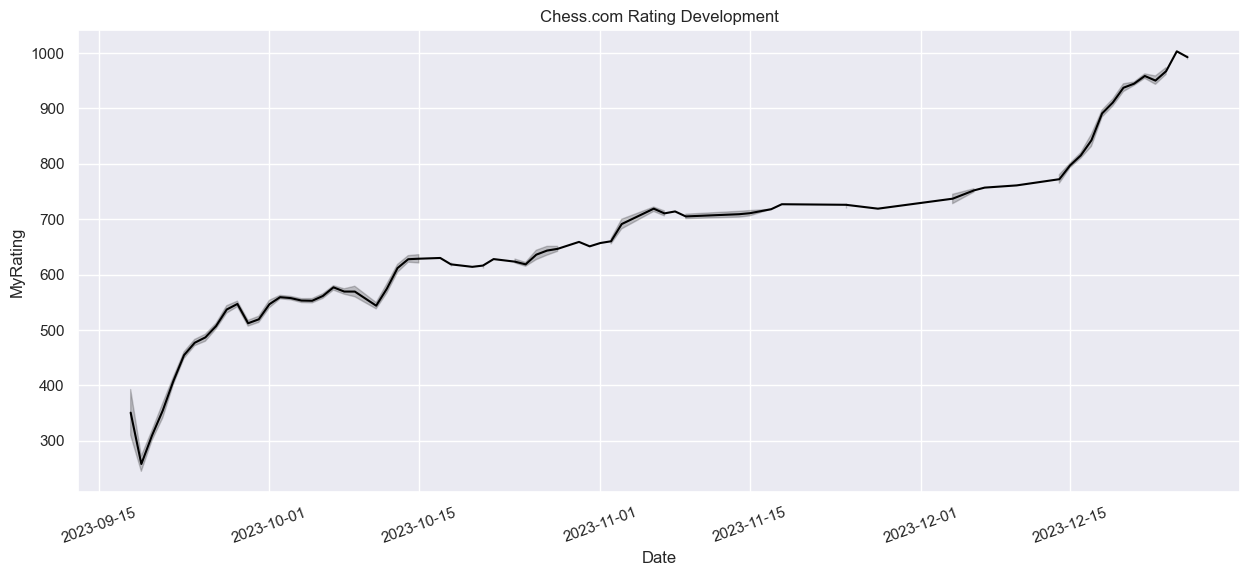

In [118]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Chess.com Rating Development")
sns.lineplot(x="Date", y="MyRating", data=df.loc[df['GameType']=='Rapid'], color="black")
plt.xticks(rotation=20)
plt.show()

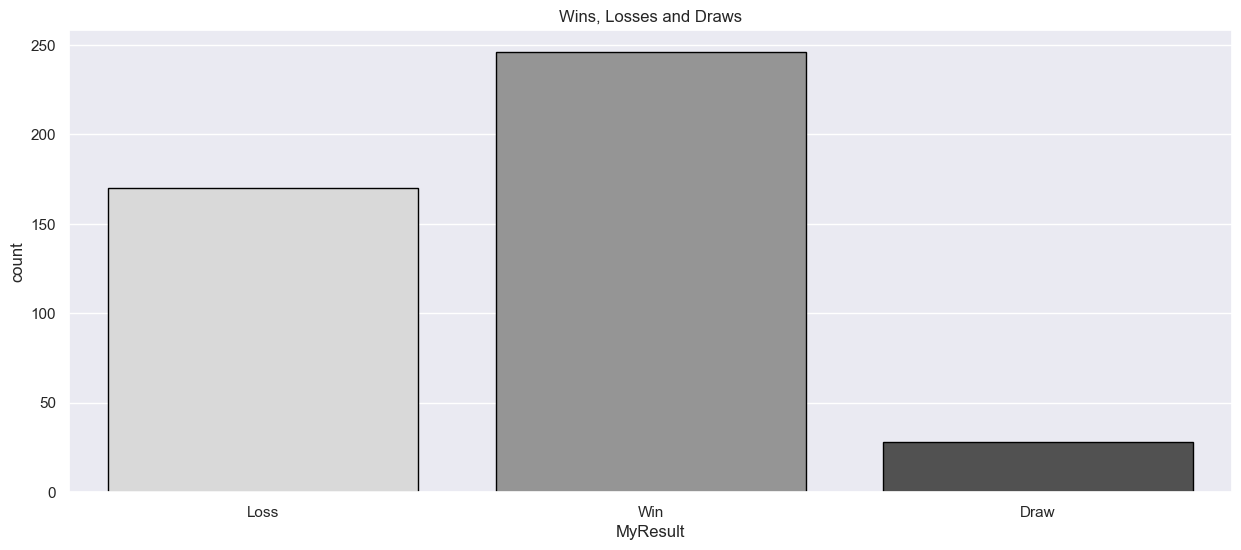

In [114]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Wins, Losses and Draws")
sns.countplot(data=df.loc[df['GameType']=='Rapid'], x='MyResult', palette="Greys", edgecolor="black")
plt.show()

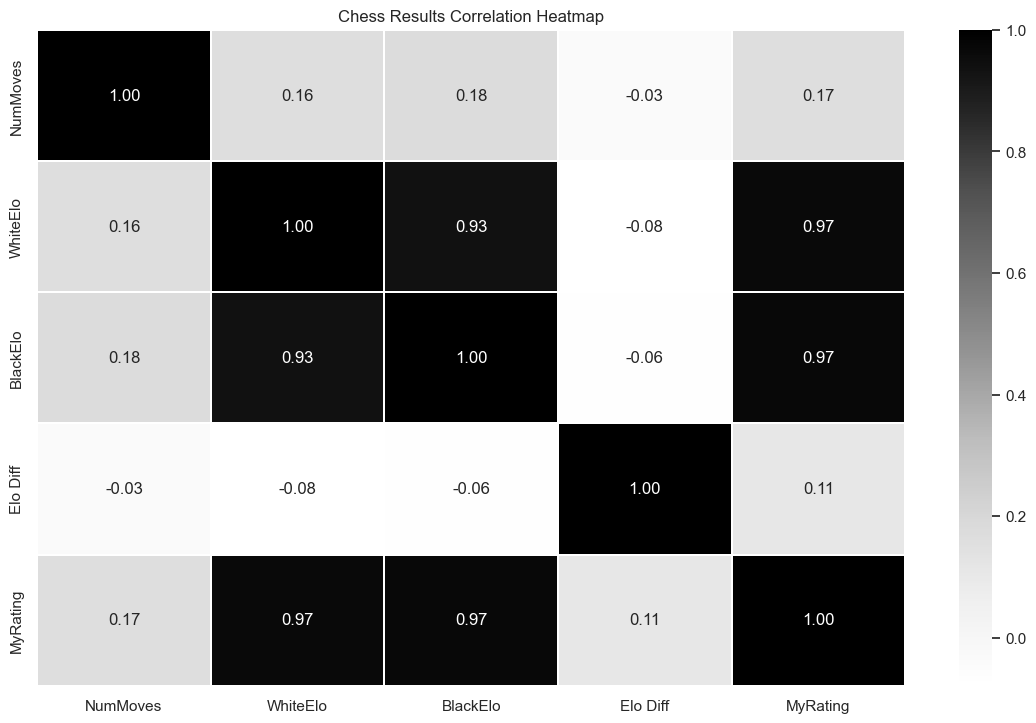

In [121]:
corr = df.corr()
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(corr, cmap="Greys", annot=True, fmt='.2f', linewidths=.05, ax=ax).set_title("Chess Results Correlation Heatmap")
fig.subplots_adjust(top=0.93)

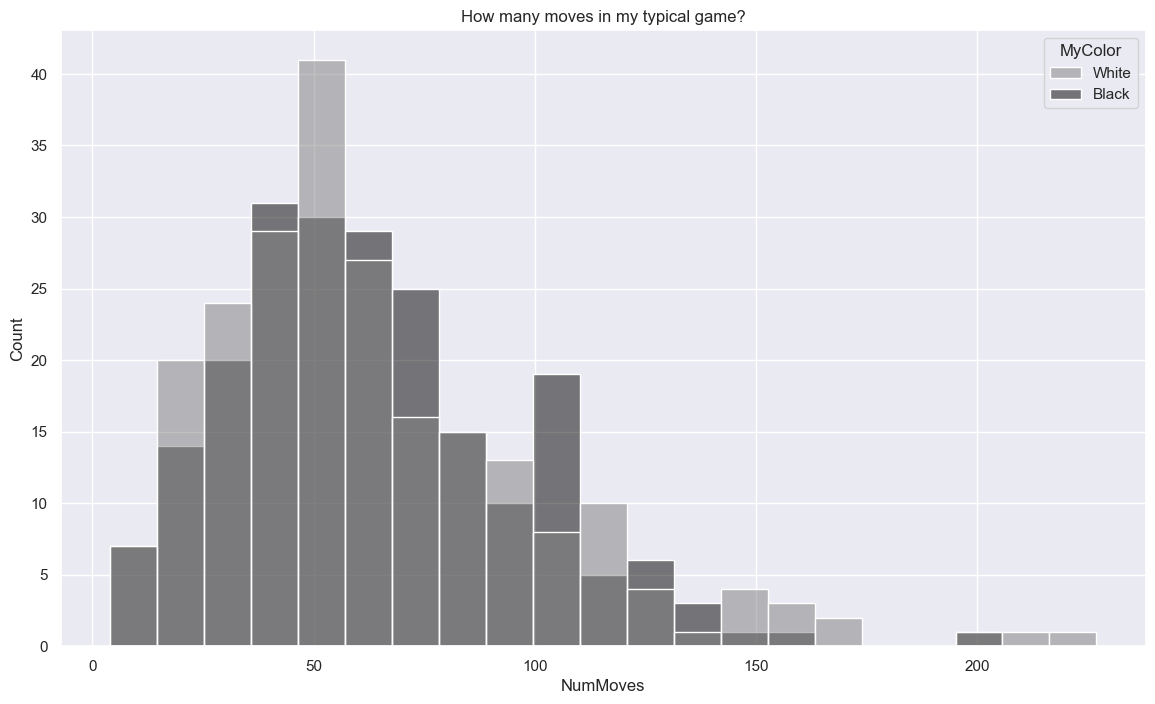

In [120]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("How many moves in my typical game?")

sns.histplot(df.loc[df['GameType']=='Rapid'], x="NumMoves", hue="MyColor", palette={"Black": "Black", "White": "Grey"})
plt.show()